In [68]:
import os
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sb
import pickle as pkl

## Define initial functions for data processing to work for different levels

In [2]:
filepath = "Animals/"
animalList = ["Human","Pig","Chicken","Rat","Mouse","Dog"]
levelList = ["Strict","Relaxed","Intermediate"]
sb.set_style("darkgrid")

In [3]:
def fill_ohnologs_df_dict(ohnologs_df_dict,working_level):
    for animal in animalList:                            
        filename_onhologs = animal.upper() + ".Pairs." + working_level + ".2R-Complete.txt"
        current_file_path = filepath + animal + "/" + working_level + "/" + filename_onhologs
        ohnologs_df_dict[animal] = pd.read_csv(current_file_path,delimiter=',')  
        ohnologs_df_dict[animal].drop(['Ohnolog-1/Sequence-ID','Ohnolog-2/Sequence-ID'],inplace=True,axis=1)

In [4]:
def fill_no_ohnologs_df_dict(no_ohnologs_df_dict,working_level,half_mode=True):
    for animal in animalList:                                    
        filename_no_onhologs = animal.upper() + ".Pairs." + "No-Ohnologs.-"
        if(half_mode):
            filename_no_onhologs = filename_no_onhologs + "Half.txt"
        else:
            filename_no_onhologs = filename_no_onhologs + "Complete.txt"
        current_file_path = filepath + animal + "/" + working_level + "/" + filename_no_onhologs
        no_ohnologs_df_dict[animal] = pd.read_csv(current_file_path,delimiter=',')  

In [5]:
def fill_paralogues_df_dict(paralogues_df_dict,working_level):
    for animal in animalList:                                    
        filename_no_onhologs = animal.upper() + ".Paralogues-Sample-Complete.csv"
        current_file_path = filepath + animal + "/" + working_level + "/" + filename_no_onhologs
        paralogues_df_dict[animal] = pd.read_csv(current_file_path,delimiter=',') 

In [6]:
def get_gc_percent(sequence):
    count = 0
    for c in sequence:
        if(c == 'G'):
            count = count + 1
        if(c == 'C'):
            count = count + 1            
    return count         

In [7]:
def procesing_ohnologs_gc_content(ohnologs_df_dict):
    for animal in animalList:      
        ohnologs_df_dict[animal]['GC_Percent_1'] = ohnologs_df_dict[animal].apply(lambda row: get_gc_percent(row["Ohnolog-1/Sequence"])/float(row["Ohnolog-1/Sequence-Lenght"]), axis=1)
        ohnologs_df_dict[animal]['GC_Percent_2'] = ohnologs_df_dict[animal].apply(lambda row: get_gc_percent(row["Ohnolog-2/Sequence"])/float(row["Ohnolog-2/Sequence-Lenght"]), axis=1)
    

In [8]:
def procesing_paralogues_gc_content(paralogues_df_dict):
    for animal in animalList:      
        paralogues_df_dict[animal]['GC_Percent_1'] = paralogues_df_dict[animal].apply(lambda row: get_gc_percent(row["Paralogue-1/Sequence"])/float(row["Paralogue-1/Sequence-Lenght"]), axis=1)
        paralogues_df_dict[animal]['GC_Percent_2'] = paralogues_df_dict[animal].apply(lambda row: get_gc_percent(row["Paralogue-2/Sequence"])/float(row["Paralogue-2/Sequence-Lenght"]), axis=1)

In [9]:
def set_plot_visuals():
    sb.set_style("darkgrid")

In [10]:
def bar_plot_ohnologs_entries(ohnologs_df_list):    
    sb.barplot(animalList,[len(i) for i in ohnologs_df_list]).set_title('Number of Ohnologs Entries')

In [11]:
def bar_plot_paralogue_entries(paralogues_df_list):    
    sb.barplot(animalList,[len(i) for i in paralogues_df_list]).set_title('Number of Paralogue Entries')

In [12]:
def scatter_ohnologs_lenght(ohnologs_df_dict):
    fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15,7))
    for i, ax in enumerate(axes.flatten()):
        animal = animalList[i]
        aux = sb.scatterplot(ohnologs_df_dict[animal]["Ohnolog-1/Sequence-Lenght"],ohnologs_df_dict[animal]["Ohnolog-2/Sequence-Lenght"],ax = ax)        
        aux.set(xlabel='Ohnolog 1 Lenght', ylabel='Ohnolog 2 Lenght')
        aux.plot([0,max(ohnologs_df_dict[animal]["Ohnolog-1/Sequence-Lenght"].max(),ohnologs_df_dict[animal]["Ohnolog-2/Sequence-Lenght"].max())], [0,max(ohnologs_df_dict[animal]["Ohnolog-1/Sequence-Lenght"].max(),ohnologs_df_dict[animal]["Ohnolog-2/Sequence-Lenght"].max())], color='r',linewidth=2)
        aux.set_title("Ohnolog " + animal +" sequence lenght versus")            
        i += 1

    fig.tight_layout()
   
    plt.show()

In [13]:
def scatter_ohnologs_gc(ohnologs_df_dict):
    fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15,7))
    for i, ax in enumerate(axes.flatten()):
        animal = animalList[i]
        aux = sb.scatterplot(ohnologs_df_dict[animal]["GC_Percent_1"],ohnologs_df_dict[animal]["GC_Percent_2"],ax = ax)        
        aux.set(xlabel='Ohnolog 1 GC', ylabel='Ohnolog 2 GC')
        aux.plot([0,max(ohnologs_df_dict[animal]["GC_Percent_1"].max(),ohnologs_df_dict[animal]["GC_Percent_2"].max())], [0,max(ohnologs_df_dict[animal]["GC_Percent_1"].max(),ohnologs_df_dict[animal]["GC_Percent_2"].max())], color='r',linewidth=2)
        aux.set_title("Ohnolog " + animal +" sequence GC versus")            
        i += 1

    fig.tight_layout()
   
    plt.show()

In [14]:
def scatter_paralogues_lenght(paralogues_df_dict):
    fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15,7))
    for i, ax in enumerate(axes.flatten()):
        animal = animalList[i]
        aux = sb.scatterplot(paralogues_df_dict[animal]["Paralogue-1/Sequence-Lenght"],paralogues_df_dict[animal]["Paralogue-2/Sequence-Lenght"],ax = ax)        
        aux.set(xlabel='Paralogue 1 Lenght', ylabel='Paralogue 2 Lenght')
        aux.plot([0,max(paralogues_df_dict[animal]["Paralogue-1/Sequence-Lenght"].max(),paralogues_df_dict[animal]["Paralogue-2/Sequence-Lenght"].max())], [0,max(paralogues_df_dict[animal]["Paralogue-1/Sequence-Lenght"].max(),paralogues_df_dict[animal]["Paralogue-2/Sequence-Lenght"].max())], color='r',linewidth=2)
        aux.set_title("Paralogue " + animal +" sequence lenght versus")            
        i += 1
    fig.tight_layout()
   
    plt.show()

In [15]:
def scatter_paralogues_gc(paralogues_df_dict):
    fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15,7))
    for i, ax in enumerate(axes.flatten()):
        animal = animalList[i]
        aux = sb.scatterplot(paralogues_df_dict[animal]["GC_Percent_1"],paralogues_df_dict[animal]["GC_Percent_2"],ax = ax)        
        aux.set(xlabel='Paralogue 1 GC', ylabel='Paralogue 2 GC')
        aux.plot([0,max(paralogues_df_dict[animal]["GC_Percent_1"].max(),paralogues_df_dict[animal]["GC_Percent_2"].max())], [0,max(paralogues_df_dict[animal]["GC_Percent_1"].max(),paralogues_df_dict[animal]["GC_Percent_2"].max())], color='r',linewidth=2)
        aux.set_title("Paralogue " + animal +" sequence gc versus")            
        i += 1

    fig.tight_layout()
   
    plt.show()

In [16]:
## We can see sequences with Null sequences (Lenght 0). Should remove them
def clean_empty_sequences(ohnologs_df_dict):
    for animal in animalList:
        animal_df = ohnologs_df_dict[animal] 
        initialCount = len(animal_df)      
        ohnologs_df_dict[animal] = animal_df[animal_df["Ohnolog-1/Sequence"].notnull()]    
        animal_df = ohnologs_df_dict[animal]
        ohnologs_df_dict[animal] =  animal_df[animal_df["Ohnolog-2/Sequence"].notnull()]
        finalCount = len(animal_df)  
        percentLoss = 1.0 - finalCount/initialCount   
        print(animal + " loss of " + str(percentLoss*100.0))


In [17]:
def clean_empty_paralogue_sequences(paralogue_df_dict):
    for animal in animalList:
        animal_df = paralogue_df_dict[animal] 
        initialCount = len(animal_df)      
        paralogue_df_dict[animal] = animal_df[animal_df["Paralogue-1/Sequence"].notnull()]    
        animal_df = paralogue_df_dict[animal]
        paralogue_df_dict[animal] =  animal_df[animal_df["Paralogue-2/Sequence"].notnull()]
        finalCount = len(animal_df)  
        percentLoss = 1.0 - finalCount/initialCount   
        print(animal + " loss of " + str(percentLoss*100.0))

# Ohnologs

## Data clean up and initial visualization of the Strict level

In [18]:
currentWorkingLevel = "Strict"
strict_ohnologs_df_dict = {}  

In [19]:
fill_ohnologs_df_dict(strict_ohnologs_df_dict,currentWorkingLevel)

In [20]:
strict_ohnologs_df_dict["Human"].head()

,Ohnolog-1 Id,Ohnolog-2 Id,Ohnolog-1 Symbol,Ohnolog-2 Symbol,Synteny Outgroup Support,Combine q-value(self) from all vetebrates,Combine q-value(outgroup) from all vetebrates,q-value from self comparison,Combined q-value for all outgroups,q-value for Amphioxus,...,q-value for Drosophila,q-value for Sea Urchin,q-value for Worm,Duplication node form Ensembl,Ohnolog-1/Sequence-Lenght,Ohnolog-1/Sequence,Ohnolog-2/Sequence-Lenght,Ohnolog-2/Sequence,Ohnolog-1/Transcript-ID,Ohnolog-2/Transcript-ID
0,ENSG00000095464,ENSG00000132915,PDE6C,PDE6A,4.0,8.228000e-06,0.000076,7.960000e-12,1.090000e-09,2.630000e-08,...,0.1011,NaN,0.9510,Vertebrata,3307,CTTTGGAAGTCCTATGAGGGACCATTTACGGTTTCCTCAGTAATTT...,5706,AGTATGTTTTGCAGACAAGACCCAGAGAAGTCCAGACTGGACTTGT...,ENST00000371447,ENST00000508173
1,ENSG00000077684,ENSG00000102221,PHF17,PHF16,5.0,1.900000e-03,0.000010,1.070000e-02,4.790000e-07,3.370000e-01,...,0.2721,NaN,0.0789,Vertebrata,5772,CGTTTTGGCAAGGGATTAAAGTGCTCCCCCCTGTGGCAGCAGTGAC...,4934,ATACAATAGTGCTCCGCGCCGCCTCAGCCGCCGCCGCCGCCCAACC...,ENST00000226319,ENST00000614628
2,ENSG00000109158,ENSG00000145863,GABRA4,GABRA6,5.0,1.923000e-09,0.000013,1.340000e-13,2.370000e-07,4.000000e-04,...,0.5206,0.0131,NaN,Vertebrata,11973,AGTCAACCTCTGGAAGTAAGTCAACTCCATTCTGAAAAAGAAGAGT...,2393,ACATAATCTAAGACCACAAACCACCTTGTTCCACGTGAGAAGGAAA...,ENST00000264318,ENST00000523217
3,ENSG00000130758,ENSG00000173327,MAP3K10,MAP3K11,5.0,8.785000e-07,0.004300,3.700000e-06,3.300000e-03,5.444000e-01,...,0.7386,0.1148,0.0853,Vertebrata,3436,CGCGCGGCCAGGCCCTCTTAGCCCTCTGCCGTTTGGGGGGCACGGG...,5605,GAAGAAGGGAGCGGGGTCGGAGCCGTCGGGGCCAAAGGAGACGGGG...,ENST00000253055,ENST00000527304
4,ENSG00000166562,ENSG00000140612,SEC11C,SEC11A,3.0,2.697000e-06,0.009500,9.420000e-07,1.140000e-02,1.457000e-01,...,0.7329,NaN,0.1060,Vertebrata,2054,CGGTGGGCGGGGGCCGGCAGGTGCTCCGCAGCCGTCTGTGCCACCC...,3626,AGCGATTCTGCTGCCACAACCTCCTGAGTAGCTGGGATTACAGGCG...,ENST00000509791,ENST00000558924


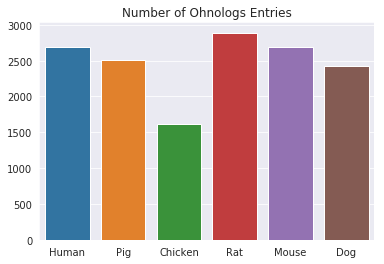

In [21]:
strict_ohnologs_df_list = list(strict_ohnologs_df_dict.values())
bar_plot_ohnologs_entries(strict_ohnologs_df_list)

In [22]:
clean_empty_sequences(strict_ohnologs_df_dict)

Human loss of 1.0760667903525034
Pig loss of 0.0
Chicken loss of 28.254164096236888
Rat loss of 14.32525951557093
Mouse loss of 0.8184523809523836
Dog loss of 0.0


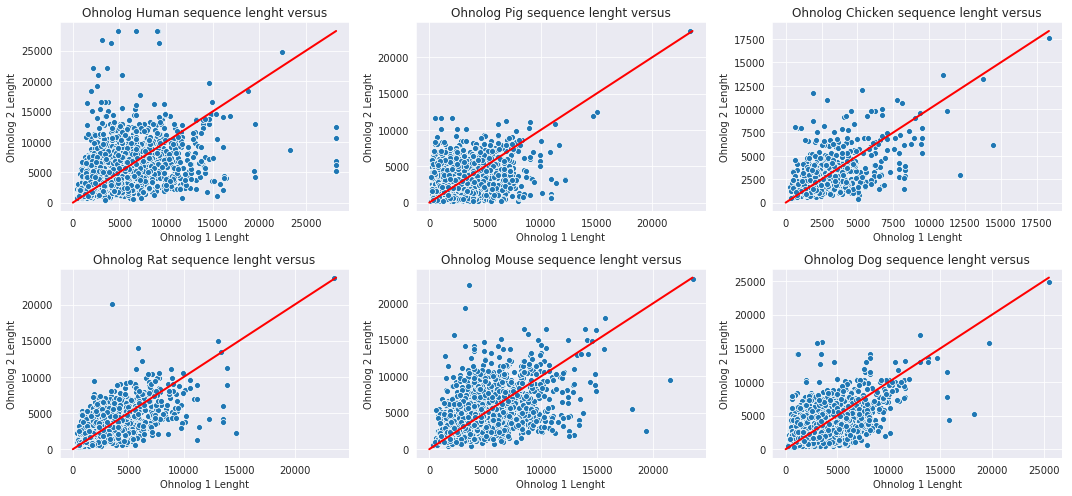

In [23]:
scatter_ohnologs_lenght(strict_ohnologs_df_dict)

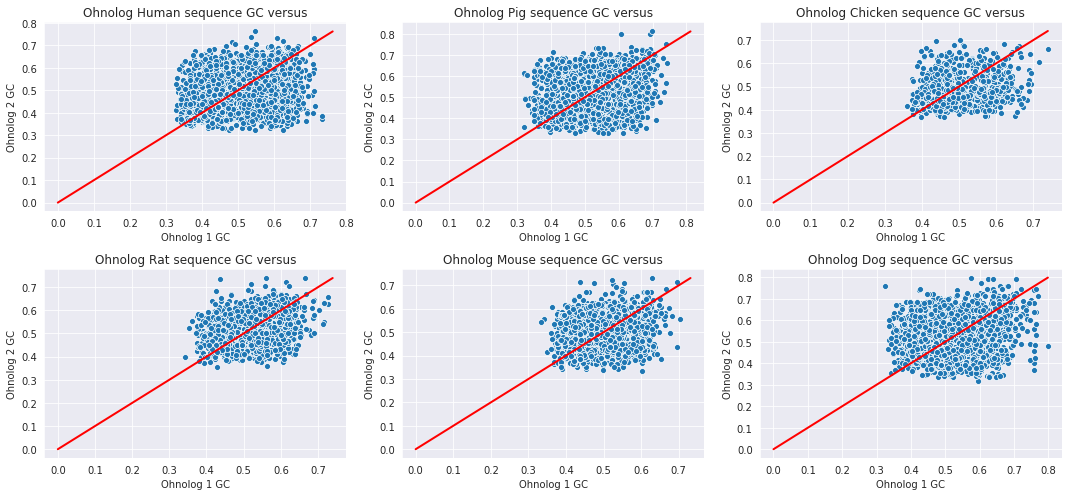

In [24]:
procesing_ohnologs_gc_content(strict_ohnologs_df_dict)
scatter_ohnologs_gc(strict_ohnologs_df_dict)

## Data clean up and initial visualization of the Intermediate level

In [25]:
currentWorkingLevel = "Intermediate"
intermediate_ohnologs_df_dict = {}  

In [26]:
fill_ohnologs_df_dict(intermediate_ohnologs_df_dict,currentWorkingLevel)

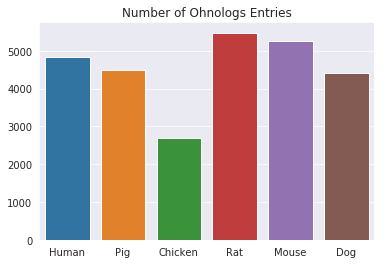

In [27]:
intermediate_ohnologs_df_list = list(intermediate_ohnologs_df_dict.values())
bar_plot_ohnologs_entries(intermediate_ohnologs_df_list)

In [28]:
clean_empty_sequences(intermediate_ohnologs_df_dict)

Human loss of 1.3880256888336495
Pig loss of 0.0
Chicken loss of 29.49666913397483
Rat loss of 13.897005113221327
Mouse loss of 1.0248624027329623
Dog loss of 0.0


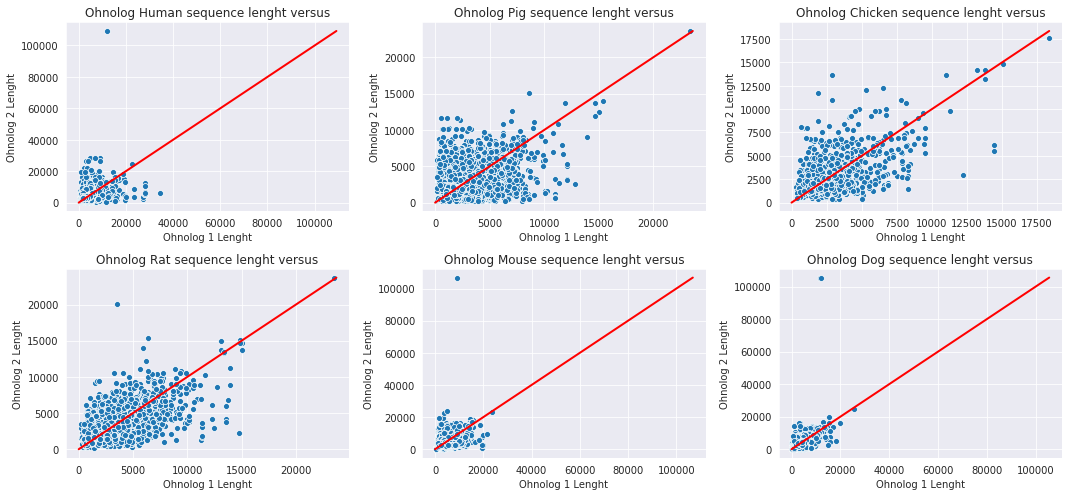

In [29]:
scatter_ohnologs_lenght(intermediate_ohnologs_df_dict)

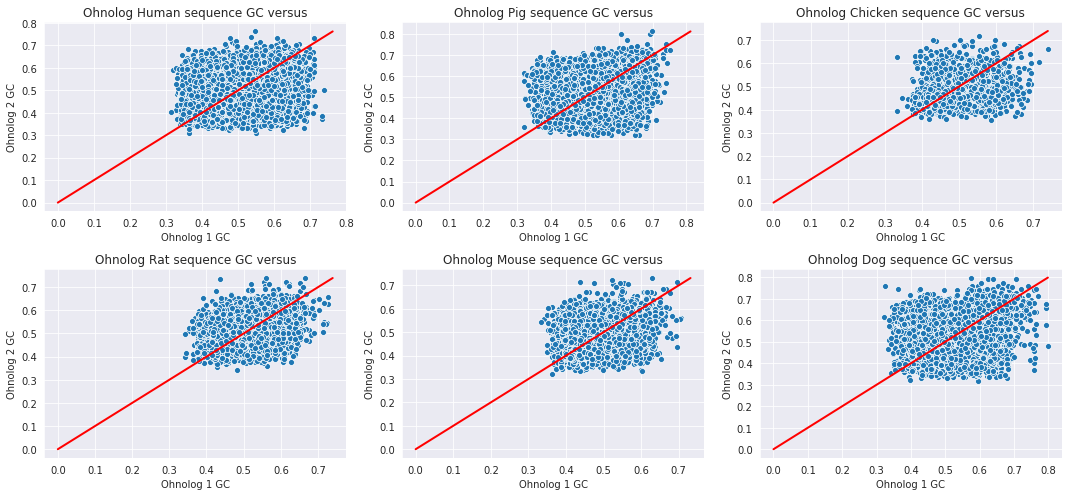

In [30]:
procesing_ohnologs_gc_content(intermediate_ohnologs_df_dict)
scatter_ohnologs_gc(intermediate_ohnologs_df_dict)

## Data clean up and initial visualization of the Relaxed level

In [31]:
currentWorkingLevel = "Relaxed"
relaxed_ohnologs_df_dict = {}  

In [32]:
fill_ohnologs_df_dict(relaxed_ohnologs_df_dict,currentWorkingLevel)

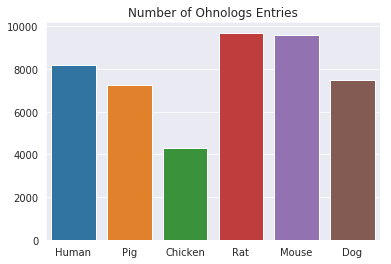

In [33]:
relaxed_ohnologs_df_list = list(relaxed_ohnologs_df_dict.values())
bar_plot_ohnologs_entries(relaxed_ohnologs_df_list)

In [34]:
clean_empty_sequences(relaxed_ohnologs_df_dict)

Human loss of 1.8341892883345534
Pig loss of 0.0
Chicken loss of 29.77580569827184
Rat loss of 13.947259991759376
Mouse loss of 1.0010427528675758
Dog loss of 0.0


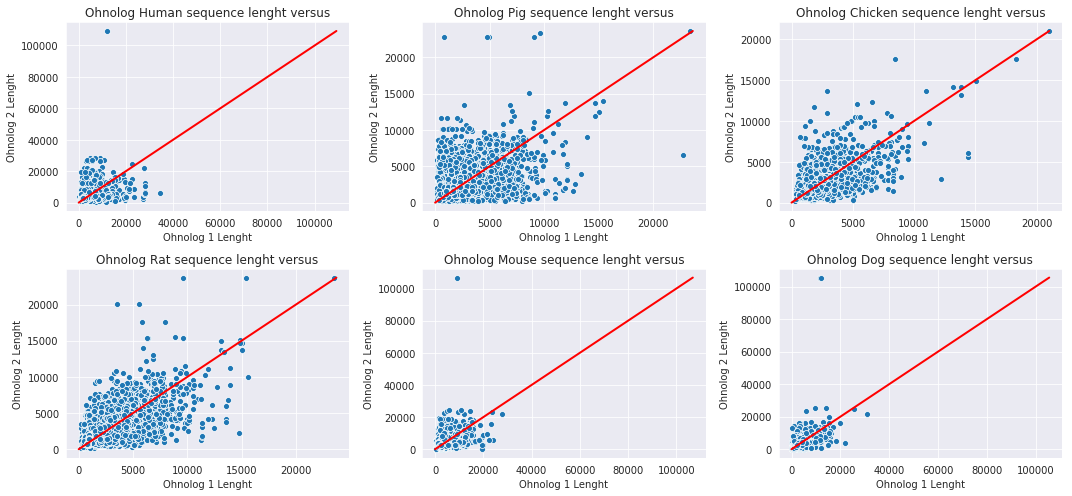

In [35]:
scatter_ohnologs_lenght(relaxed_ohnologs_df_dict)

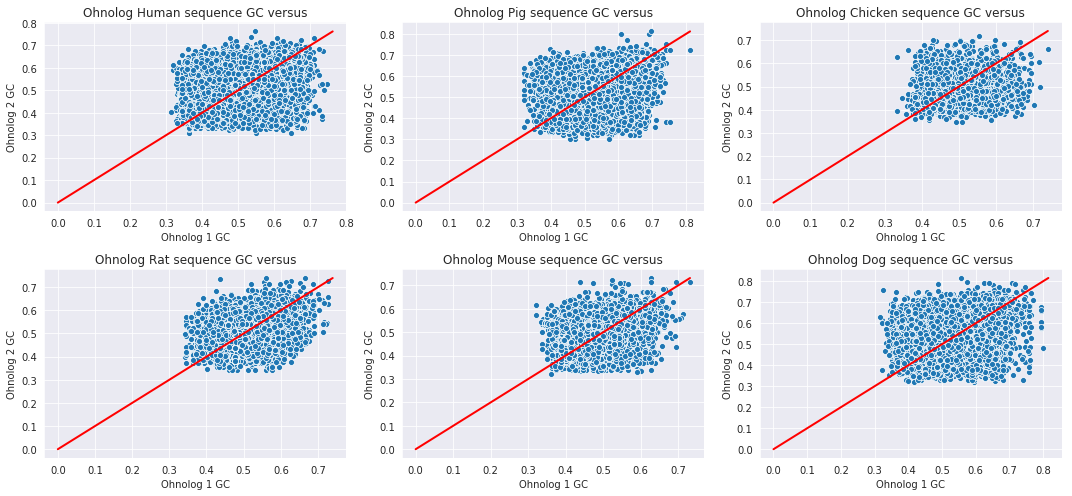

In [36]:
procesing_ohnologs_gc_content(relaxed_ohnologs_df_dict)
scatter_ohnologs_gc(relaxed_ohnologs_df_dict)

# No Ohnologs

## Procesing the No-Ohnologs dataset - Strict

In [37]:
currentWorkingLevel = "Strict"
strict_no_ohnologs_df_dict = {}  

In [38]:
fill_no_ohnologs_df_dict(strict_no_ohnologs_df_dict,currentWorkingLevel)

In [39]:
strict_no_ohnologs_df_dict["Human"].head()

,Ohnolog-1 Id,Ohnologs-2 Id,Ohnolog-1/Transcript-ID,Ohnolog-1/Sequence-Lenght,Ohnolog-1/Sequence,Ohnolog-2/Transcript-ID,Ohnolog-2/Sequence-Lenght,Ohnolog-2/Sequence
0,ENSG00000187624,ENSG00000163297,ENST00000360127,1839,AGCAGGGGTGGTCGCCATGGAGACGCGTGGCCCTGGCCTGGCGGTC...,ENST00000403729,8273,TTTCGGAGTGCGGAGGGAGTTGGGGCCGCCGGAGGAGAAGAGTCTC...
1,ENSG00000117280,ENSG00000140105,ENST00000367139,3272,GGAAGGGGAGAGAGAGGCGCGCGGGAGGGCGTCTAGGGAATCGAGG...,ENST00000355338,3092,TGTCAAGCCCTATGCTGGGTCTGGTGTGGGTGGAAATCAAACACAA...
2,ENSG00000226463,ENSG00000117834,ENST00000421027,1028,CCTTGTATCATCATCTACCTCCTCCTCCTCCTTTTCTCACTCTAGG...,ENST00000493837,3769,GTCCAGCCTGCTGTTGACCAACACTAACAGATGAGCAAGGAGCTGG...
3,ENSG00000144136,ENSG00000170537,ENST00000272542,3381,GCTTCGGGGCCGGCGCGAGGCGCGGCGGGGTCACGCGGGTCGCTGC...,ENST00000421369,4499,TTCCTTATTCCTGCTCCCTCCACAAACGCGTCCTCATCCAATCCAG...
4,ENSG00000065559,ENSG00000230778,ENST00000415385,3856,GAGCTTGCTGCATTGCAGCCGCCGCGGCGCCGCTCGGCTCTTCACT...,ENST00000434396,1143,ATGCTCAAACCCAAGGACCTGTGCCCCCGAGCGGGGACGCGCACCT...


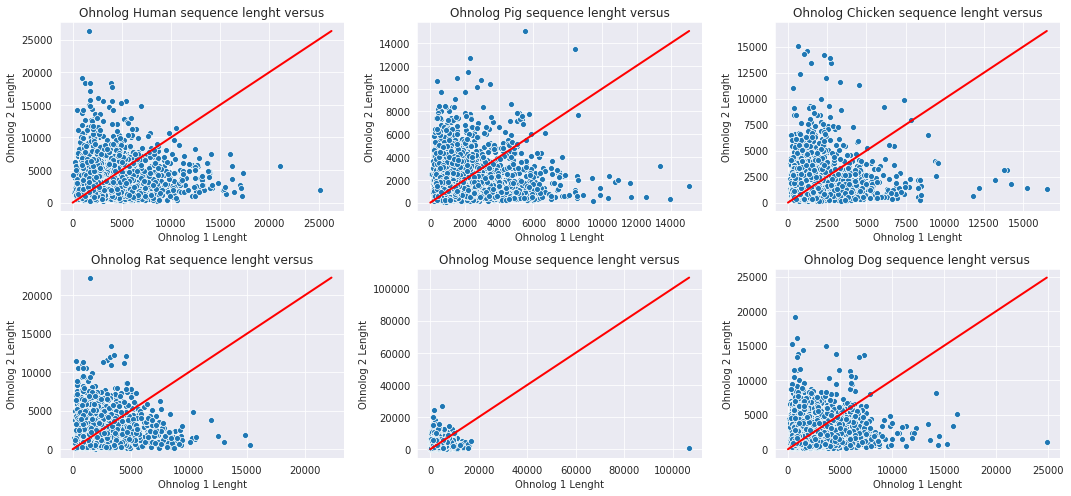

In [40]:
scatter_ohnologs_lenght(strict_no_ohnologs_df_dict)

In [41]:
clean_empty_sequences(strict_no_ohnologs_df_dict)

Human loss of 0.0
Pig loss of 0.0
Chicken loss of 0.0
Rat loss of 0.0
Mouse loss of 0.0
Dog loss of 0.0


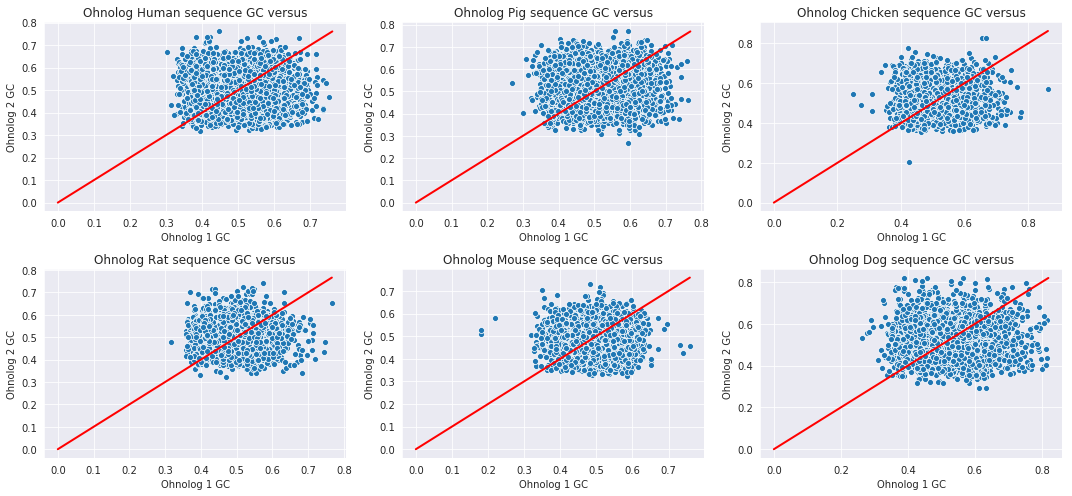

In [42]:
procesing_ohnologs_gc_content(strict_no_ohnologs_df_dict)
scatter_ohnologs_gc(strict_no_ohnologs_df_dict)

## Procesing the No-Ohnologs dataset - Intermidiate

In [43]:
currentWorkingLevel = "Intermediate"
intermediate_no_ohnologs_df_dict = {}  

In [44]:
fill_no_ohnologs_df_dict(intermediate_no_ohnologs_df_dict,currentWorkingLevel)

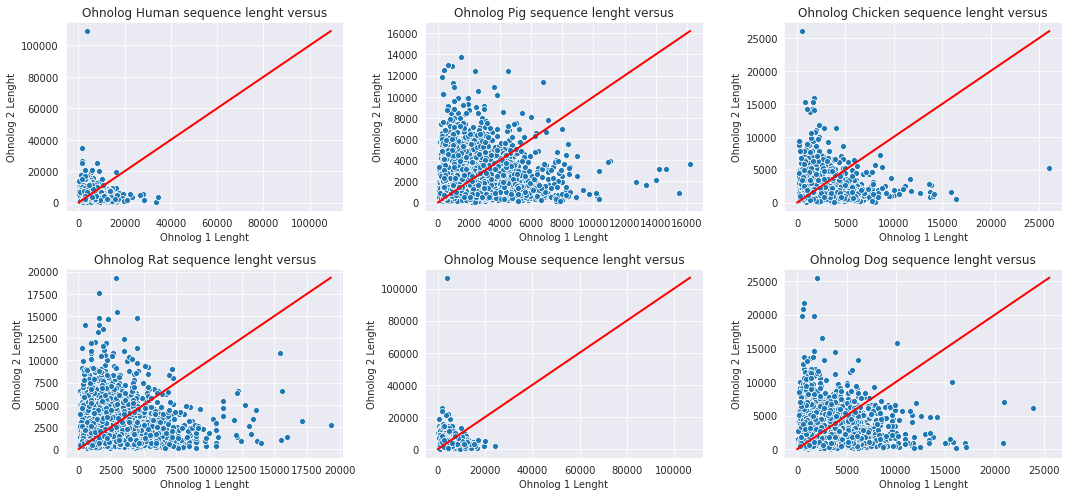

In [45]:
scatter_ohnologs_lenght(intermediate_no_ohnologs_df_dict)

In [46]:
clean_empty_sequences(intermediate_no_ohnologs_df_dict)

Human loss of 0.0
Pig loss of 0.0
Chicken loss of 0.0
Rat loss of 0.0
Mouse loss of 0.0
Dog loss of 0.0


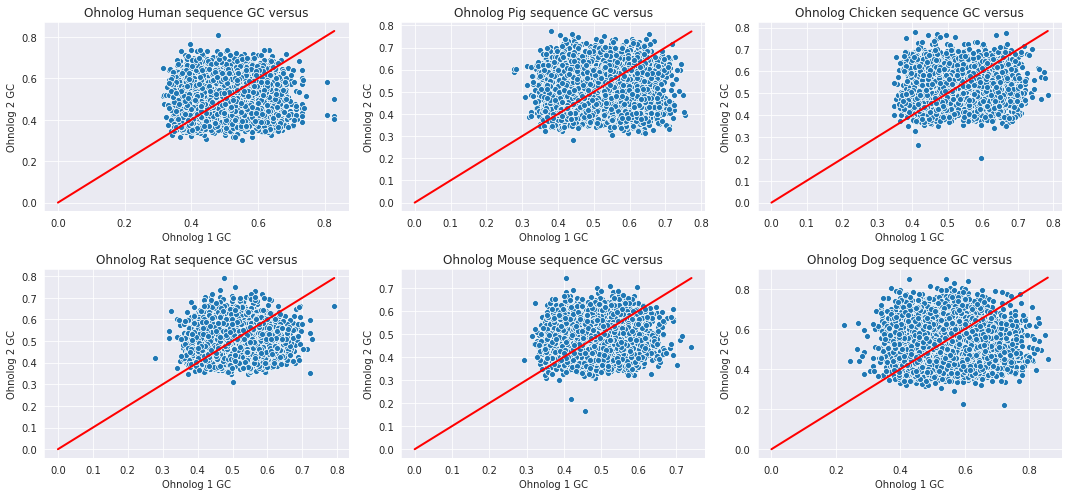

In [47]:
procesing_ohnologs_gc_content(intermediate_no_ohnologs_df_dict)
scatter_ohnologs_gc(intermediate_no_ohnologs_df_dict)

## Procesing the No-Ohnologs dataset - Relaxed

In [48]:
currentWorkingLevel = "Relaxed"
relaxed_no_ohnologs_df_dict = {} 

In [49]:
fill_no_ohnologs_df_dict(relaxed_no_ohnologs_df_dict,currentWorkingLevel)

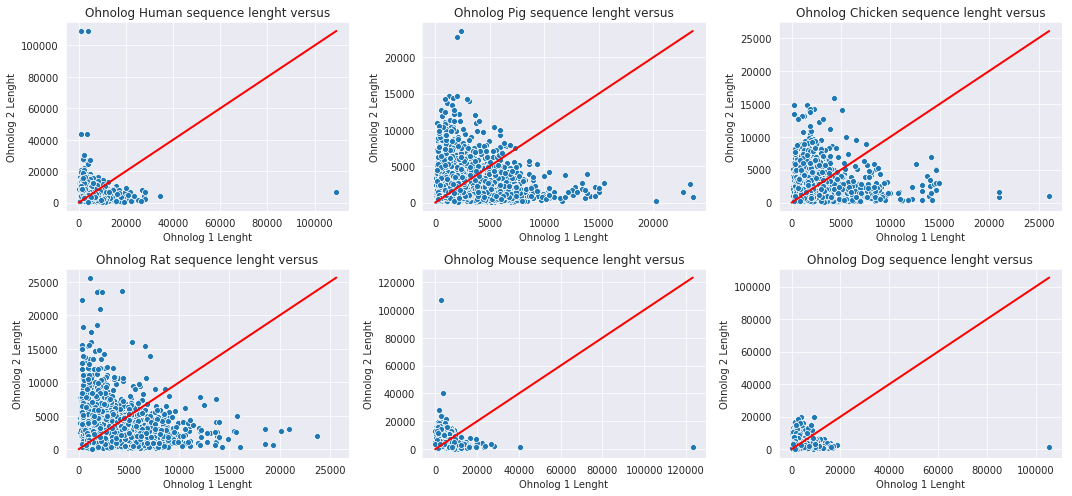

In [50]:
scatter_ohnologs_lenght(relaxed_no_ohnologs_df_dict)

In [51]:
clean_empty_sequences(relaxed_no_ohnologs_df_dict)

Human loss of 0.0
Pig loss of 0.0
Chicken loss of 0.0
Rat loss of 0.0
Mouse loss of 0.0
Dog loss of 0.0


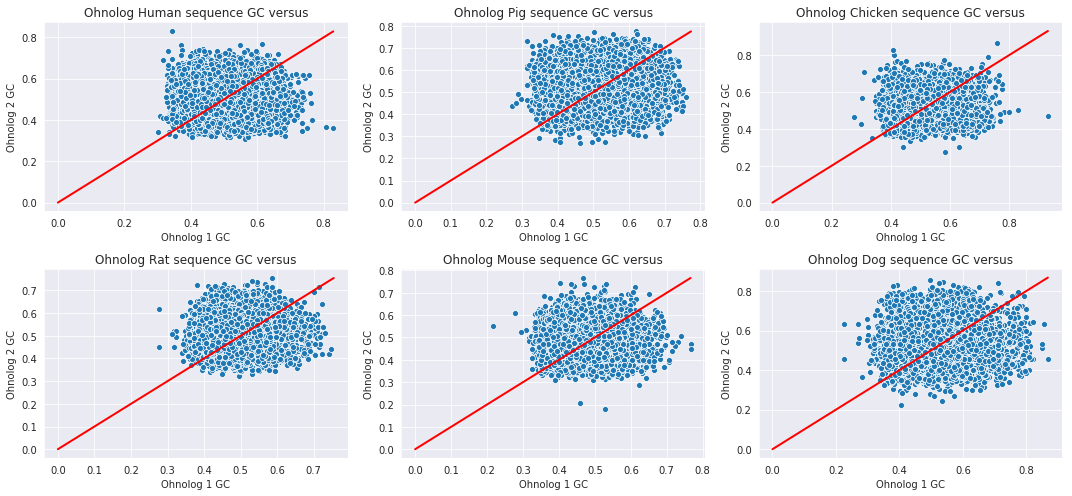

In [52]:
procesing_ohnologs_gc_content(relaxed_no_ohnologs_df_dict)
scatter_ohnologs_gc(relaxed_no_ohnologs_df_dict)

# Paralogues

## Procesing paralogues in Strict Level

In [53]:
currentWorkingLevel = "Strict"
strict_paralogues_df_dict = {}  

In [54]:
fill_paralogues_df_dict(strict_paralogues_df_dict,currentWorkingLevel)

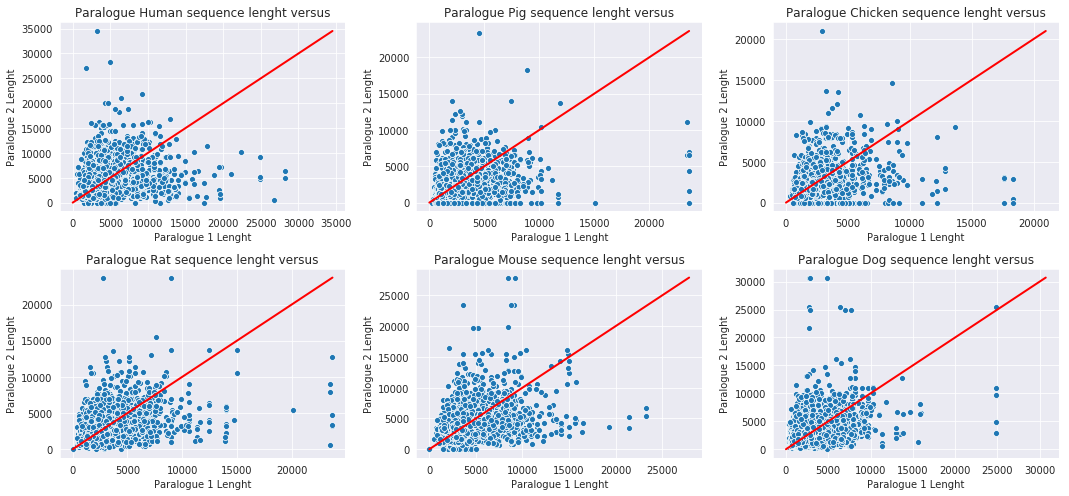

In [55]:
scatter_paralogues_lenght(strict_paralogues_df_dict)

In [56]:
clean_empty_paralogue_sequences(strict_paralogues_df_dict)

Human loss of 0.0
Pig loss of 0.0
Chicken loss of 0.0
Rat loss of 0.06920415224913601
Mouse loss of 0.07440476190476719
Dog loss of 0.0


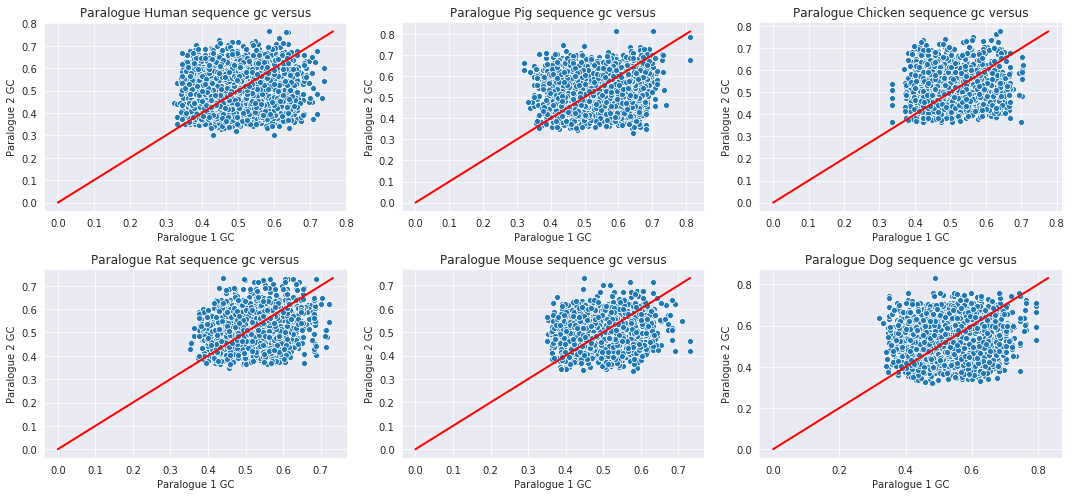

In [57]:
procesing_paralogues_gc_content(strict_paralogues_df_dict)
scatter_paralogues_gc(strict_paralogues_df_dict)

## Procesing paralogues in Intermediate Level

In [58]:
currentWorkingLevel = "Intermediate"
intermediate_paralogues_df_dict = {}  

In [59]:
fill_paralogues_df_dict(intermediate_paralogues_df_dict,currentWorkingLevel)

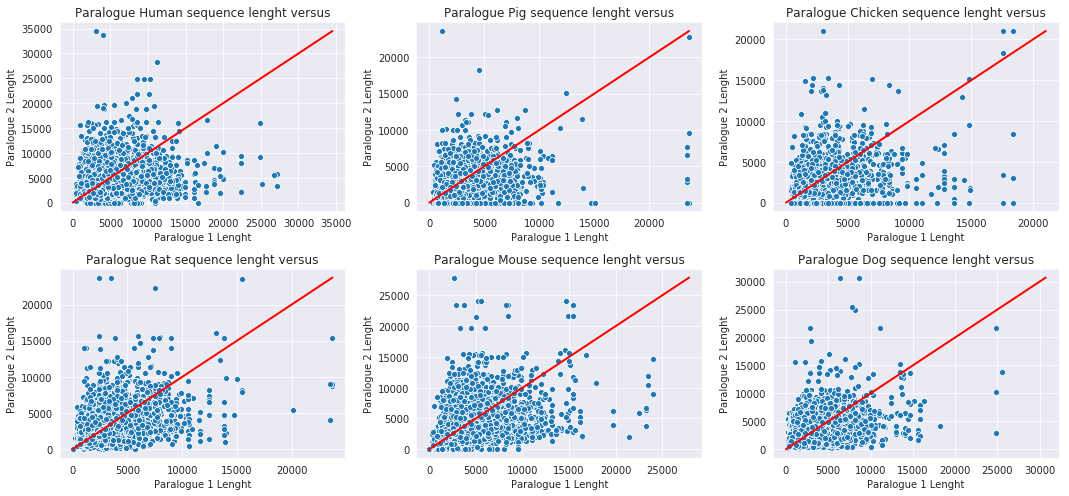

In [60]:
scatter_paralogues_lenght(intermediate_paralogues_df_dict)

In [61]:
clean_empty_paralogue_sequences(intermediate_paralogues_df_dict)

Human loss of 0.0
Pig loss of 0.0
Chicken loss of 0.0
Rat loss of 0.09130752373995854
Mouse loss of 0.03795786676789037
Dog loss of 0.0


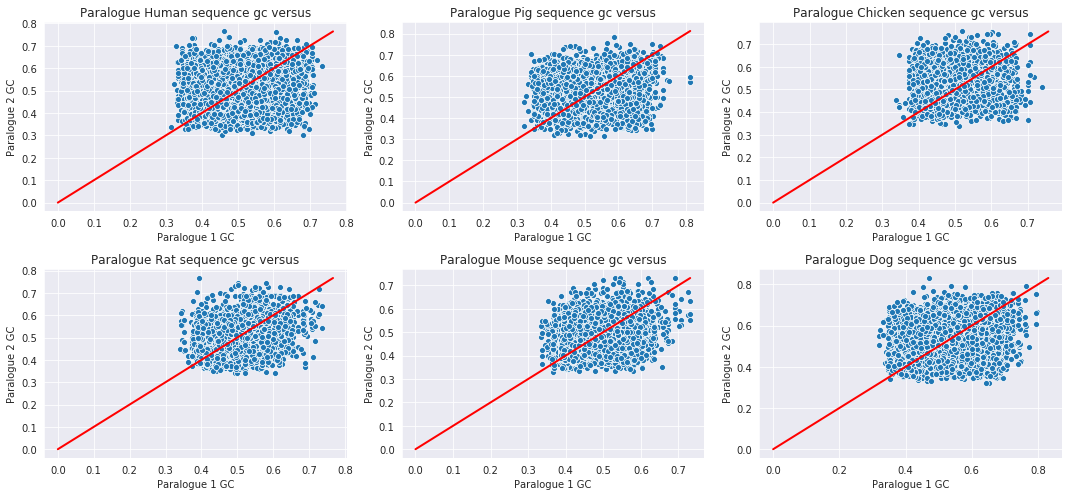

In [62]:
procesing_paralogues_gc_content(intermediate_paralogues_df_dict)
scatter_paralogues_gc(intermediate_paralogues_df_dict)

## Procesing paralogues in Relaxed Level

In [63]:
currentWorkingLevel = "Relaxed"
relaxed_paralogues_df_dict = {}  

In [64]:
fill_paralogues_df_dict(relaxed_paralogues_df_dict,currentWorkingLevel)

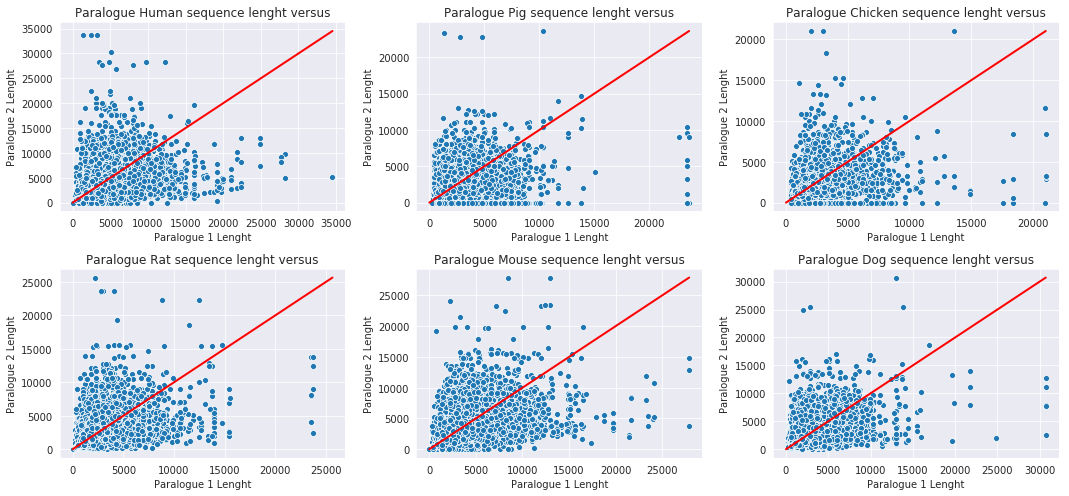

In [65]:
scatter_paralogues_lenght(relaxed_paralogues_df_dict)

In [66]:
clean_empty_paralogue_sequences(relaxed_paralogues_df_dict)

Human loss of 0.012227928588892656
Pig loss of 0.0
Chicken loss of 0.0
Rat loss of 0.0721054800164822
Mouse loss of 0.06256517205421863
Dog loss of 0.0


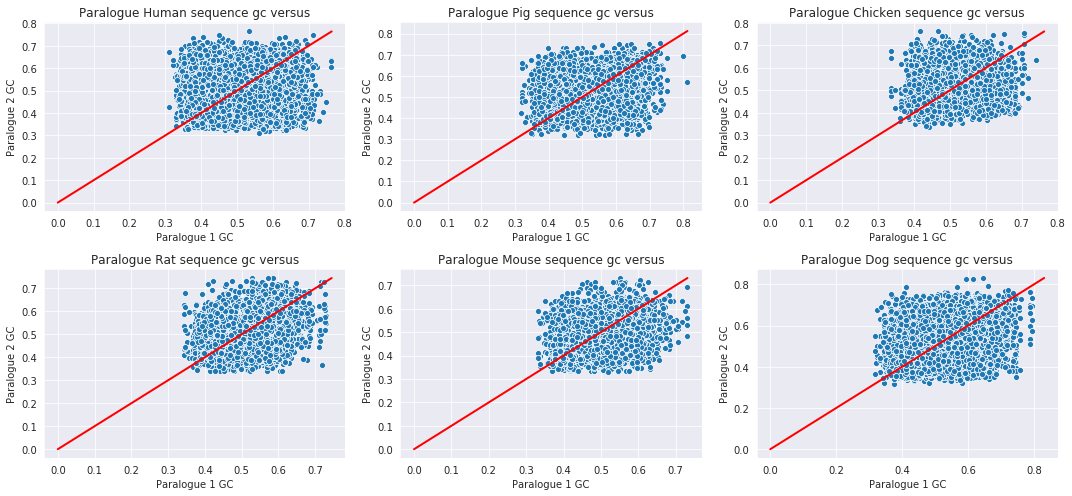

In [67]:
procesing_paralogues_gc_content(relaxed_paralogues_df_dict)
scatter_paralogues_gc(relaxed_paralogues_df_dict)

## Pickle generation of all dictionaries

In [72]:
levelList = ["Strict","Intermediate","Relaxed"]
ohnologs_levels_dict = {}
ohnologs_levels_dict["Strict"] = strict_ohnologs_df_dict
ohnologs_levels_dict["Intermediate"] = intermediate_ohnologs_df_dict
ohnologs_levels_dict["Relaxed"] = relaxed_ohnologs_df_dict

for animal in animalList:
    for level in levelList:       
        current_file_path = filepath + animal + "/" + level + "/"
        ohnologs_levels_dict[level][animal].to_pickle(current_file_path + animal + "-" + level + "-ohnologs.pkl")                

In [74]:
no_ohnologs_levels_dict = {}
no_ohnologs_levels_dict["Strict"] = strict_no_ohnologs_df_dict
no_ohnologs_levels_dict["Intermediate"] = intermediate_no_ohnologs_df_dict
no_ohnologs_levels_dict["Relaxed"] = relaxed_no_ohnologs_df_dict

for animal in animalList:
    for level in levelList:       
        current_file_path = filepath + animal + "/" + level + "/"
        no_ohnologs_levels_dict[level][animal].to_pickle(current_file_path + animal + "-" + level + "-no-ohnologs.pkl")                

In [76]:
paralogue_levels_dict = {}
paralogue_levels_dict["Strict"] = strict_paralogues_df_dict
paralogue_levels_dict["Intermediate"] = intermediate_paralogues_df_dict
paralogue_levels_dict["Relaxed"] = relaxed_paralogues_df_dict

for animal in animalList:
    for level in levelList:       
        current_file_path = filepath + animal + "/" + level + "/"
        paralogue_levels_dict[level][animal].to_pickle(current_file_path + animal + "-" + level + "-paralogues.pkl")    